In [1]:
import sys
import os
# Adding the src directory to the Python path
sys.path.append(os.path.abspath('../src'))
from utils import load_saved_model
from model_evaluation import get_test_dataset, evaluate_model, display_and_save_confution_matrix

2024-07-02 10:15:04.919056: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Setting up variables
test_dir = '../datasets/resized_ready/val'
cm_save_path = '../results/cm.png'
image_width = 224
image_height = 224

#Loading the model
model = load_saved_model('../models')

#loading the test data
test_dataset = get_test_dataset(test_dir, image_width, image_height)


2024-07-02 10:15:07.388891: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-02 10:15:07.517197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 10:15:07.517242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-02 10:15:07.517267: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-02 10:15:07.525170: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-02 10:15:07.525253: I tensorflow/str

Found 877 files belonging to 2 classes.


In [3]:
test_loss, test_acc, cm, true_labels, predicted_labels, f1, precision, recall = evaluate_model(model, test_dataset)
print(f'Test accuracy: {test_acc}   test_loss: {test_loss}')
print(f'precision: {precision}   recall: {recall}')
print(f' f1: {f1}')


2024-07-02 10:15:10.115330: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-02 10:15:10.115784: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz
2024-07-02 10:15:10.683540: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-02 10:15:11.674793: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-07-02 10:15:12.889267: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-02 10:15:12.889334: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-07-02 10:15:12.963118: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-02 10:15:12.963275: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

28/28 [==============================] - 1s 26ms/step - loss: 0.3046 - accuracy: 0.9099
              precision    recall  f1-score   support

      Normal       0.24      0.22      0.23       237
   Pneumonia       0.72      0.75      0.73       640

    accuracy                           0.60       877
   macro avg       0.48      0.48      0.48       877
weighted avg       0.59      0.60      0.60       877

Test accuracy: 0.9099201560020447   test_loss: 0.3045918047428131
precision: 0.5917977000400401   recall: 0.6043329532497149
 f1: 0.5977359551503957


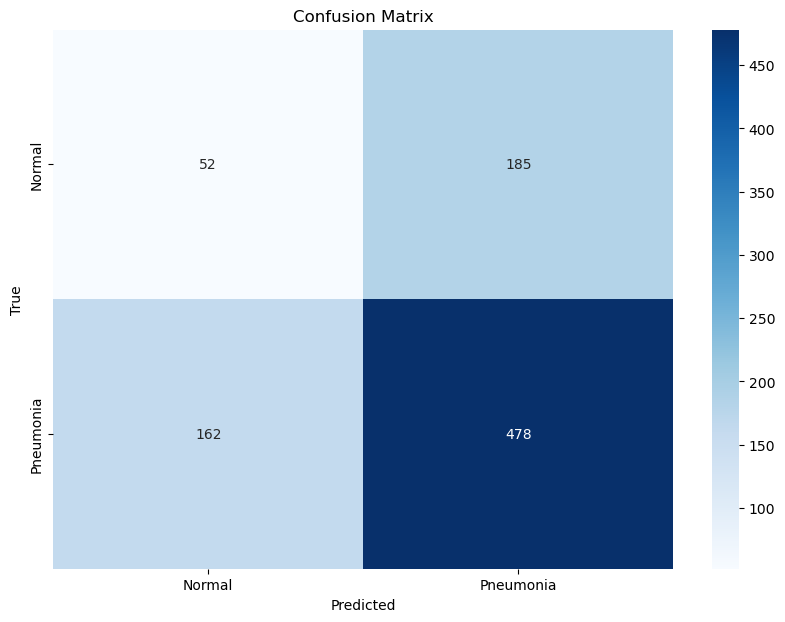

In [4]:
#display results
display_and_save_confution_matrix(cm, test_dataset, cm_save_path)